# Импорт

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.gridspec as gridspec


# Загрузите датасет для регрессии, выделите целевой признак и предикторы.
<b>Целевой признак</b>: Appliances

- Tdewpoint - точка россы
- Windspeed - скорость ветра
- Press_mm_hg - давление мм/рт.ст.
- absolute_magnitude - абсолютная звёздная величина
- Appliances - прибор (применение)
- 

In [11]:
models = pd.read_csv('../Data/energy_task_moded_removed_nan.csv')
models

Appliances  lights         T1       RH_1         T2       RH_2  \
0              60      30  19.890000  47.596667  19.200000  44.790000   
1              60      30  19.890000  46.693333  19.200000  44.722500   
2              50      30  19.890000  46.300000  19.200000  44.626667   
3              50      40  19.890000  46.066667  19.200000  44.590000   
4              60      40  19.890000  46.333333  19.200000  44.530000   
...           ...     ...        ...        ...        ...        ...   
18533         100       0  25.566667  46.560000  25.890000  42.025714   
18534          90       0  25.500000  46.500000  25.754000  42.080000   
18535         270      10  25.500000  46.596667  25.628571  42.768571   
18536         420      10  25.500000  46.990000  25.414000  43.036000   
18537         430      10  25.500000  46.600000  25.264286  42.971429   

              T3       RH_3         T4       RH_4  ...  T_out  Press_mm_hg  \
0      19.790000  44.730000  19.000000  45.566667  ...   6.60        733.5   
1      19.790000  44.790000  19.000000  45.992500  ...   6.48        733.6   
2      19.790000  44.933333  18.926667  45.890000  ...   6.37        733.7   
3      19.790000  45.000000  18.890000  45.723333  ...   6.25        733.8   
4      19.790000  45.000000  18.890000  45.530000  ...   6.13        733.9   
...          ...        ...        ...        ...  ...    ...          ...   
18533  27.200000  41.163333  24.700000  45.590000  ...  22.70        755.2   
18534  27.133333  41.223333  24.700000  45.590000  ...  22.60        755.2   
18535  27.050000  41.690000  24.700000  45.730000  ...  22.50        755.2   
18536  26.890000  41.290000  24.700000  45.790000  ...  22.30        755.2   
18537  26.823333  41.156667  24.700000  45.963333  ...  22.20        755.2   

          RH_out  Windspeed  Visibility  Tdewpoint  day  month  year  time  
0      92.000000   7.000000   63.000000        5.3   11      1  2016  1020  
1      92.000000   6.666667   59.166667        5.2   11      1  2016  1030  
2      92.000000   6.333333   55.333333        5.1   11      1  2016  1040  
3      92.000000   6.000000   51.500000        5.0   11      1  2016  1050  
4      92.000000   5.666667   47.666667        4.9   11      1  2016  1060  
...          ...        ...         ...        ...  ...    ...   ...   ...  
18533  55.666667   3.333333   23.666667       13.3   27      5  2016  1040  
18534  56.000000   3.500000   24.500000       13.3   27      5  2016  1050  
18535  56.333333   3.666667   25.333333       13.3   27      5  2016  1060  
18536  56.666667   3.833333   26.166667       13.2   27      5  2016  1070  
18537  57.000000   4.000000   27.000000       13.2   27      5  2016  1080  

[18538 rows x 30 columns]

In [12]:
models.columns

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'day', 'month', 'year', 'time'],
      dtype='object')

In [13]:
models['Appliances'].unique()

array([  60,   50,   70,  230,  580,  430,  250,  100,   90,   80,  140,
        120,  190,  110,  400,  390,  240,   40,   30,  310,  380,   20,
        260,  450,  170,  290,  130,  370,  200,  210,  180,  350,  300,
        150,  330,  420,  520,  360,  340,  550,  690,  620,  610,  490,
        220,  410,  270,  740,  910,  510,  790,  460,  500,  160,  480,
        280,  560,  750,  470,  320,  440,  800,  540,  530,  660,  630,
        600,   10,  570,  830, 1070,  890,  590,  850,  710,  680,  670,
        780,  640,  650,  700,  770,  720,  760,  860,  880,  730,  900,
        870,  840,  820], dtype=int64)

# Выявляем кореляцию

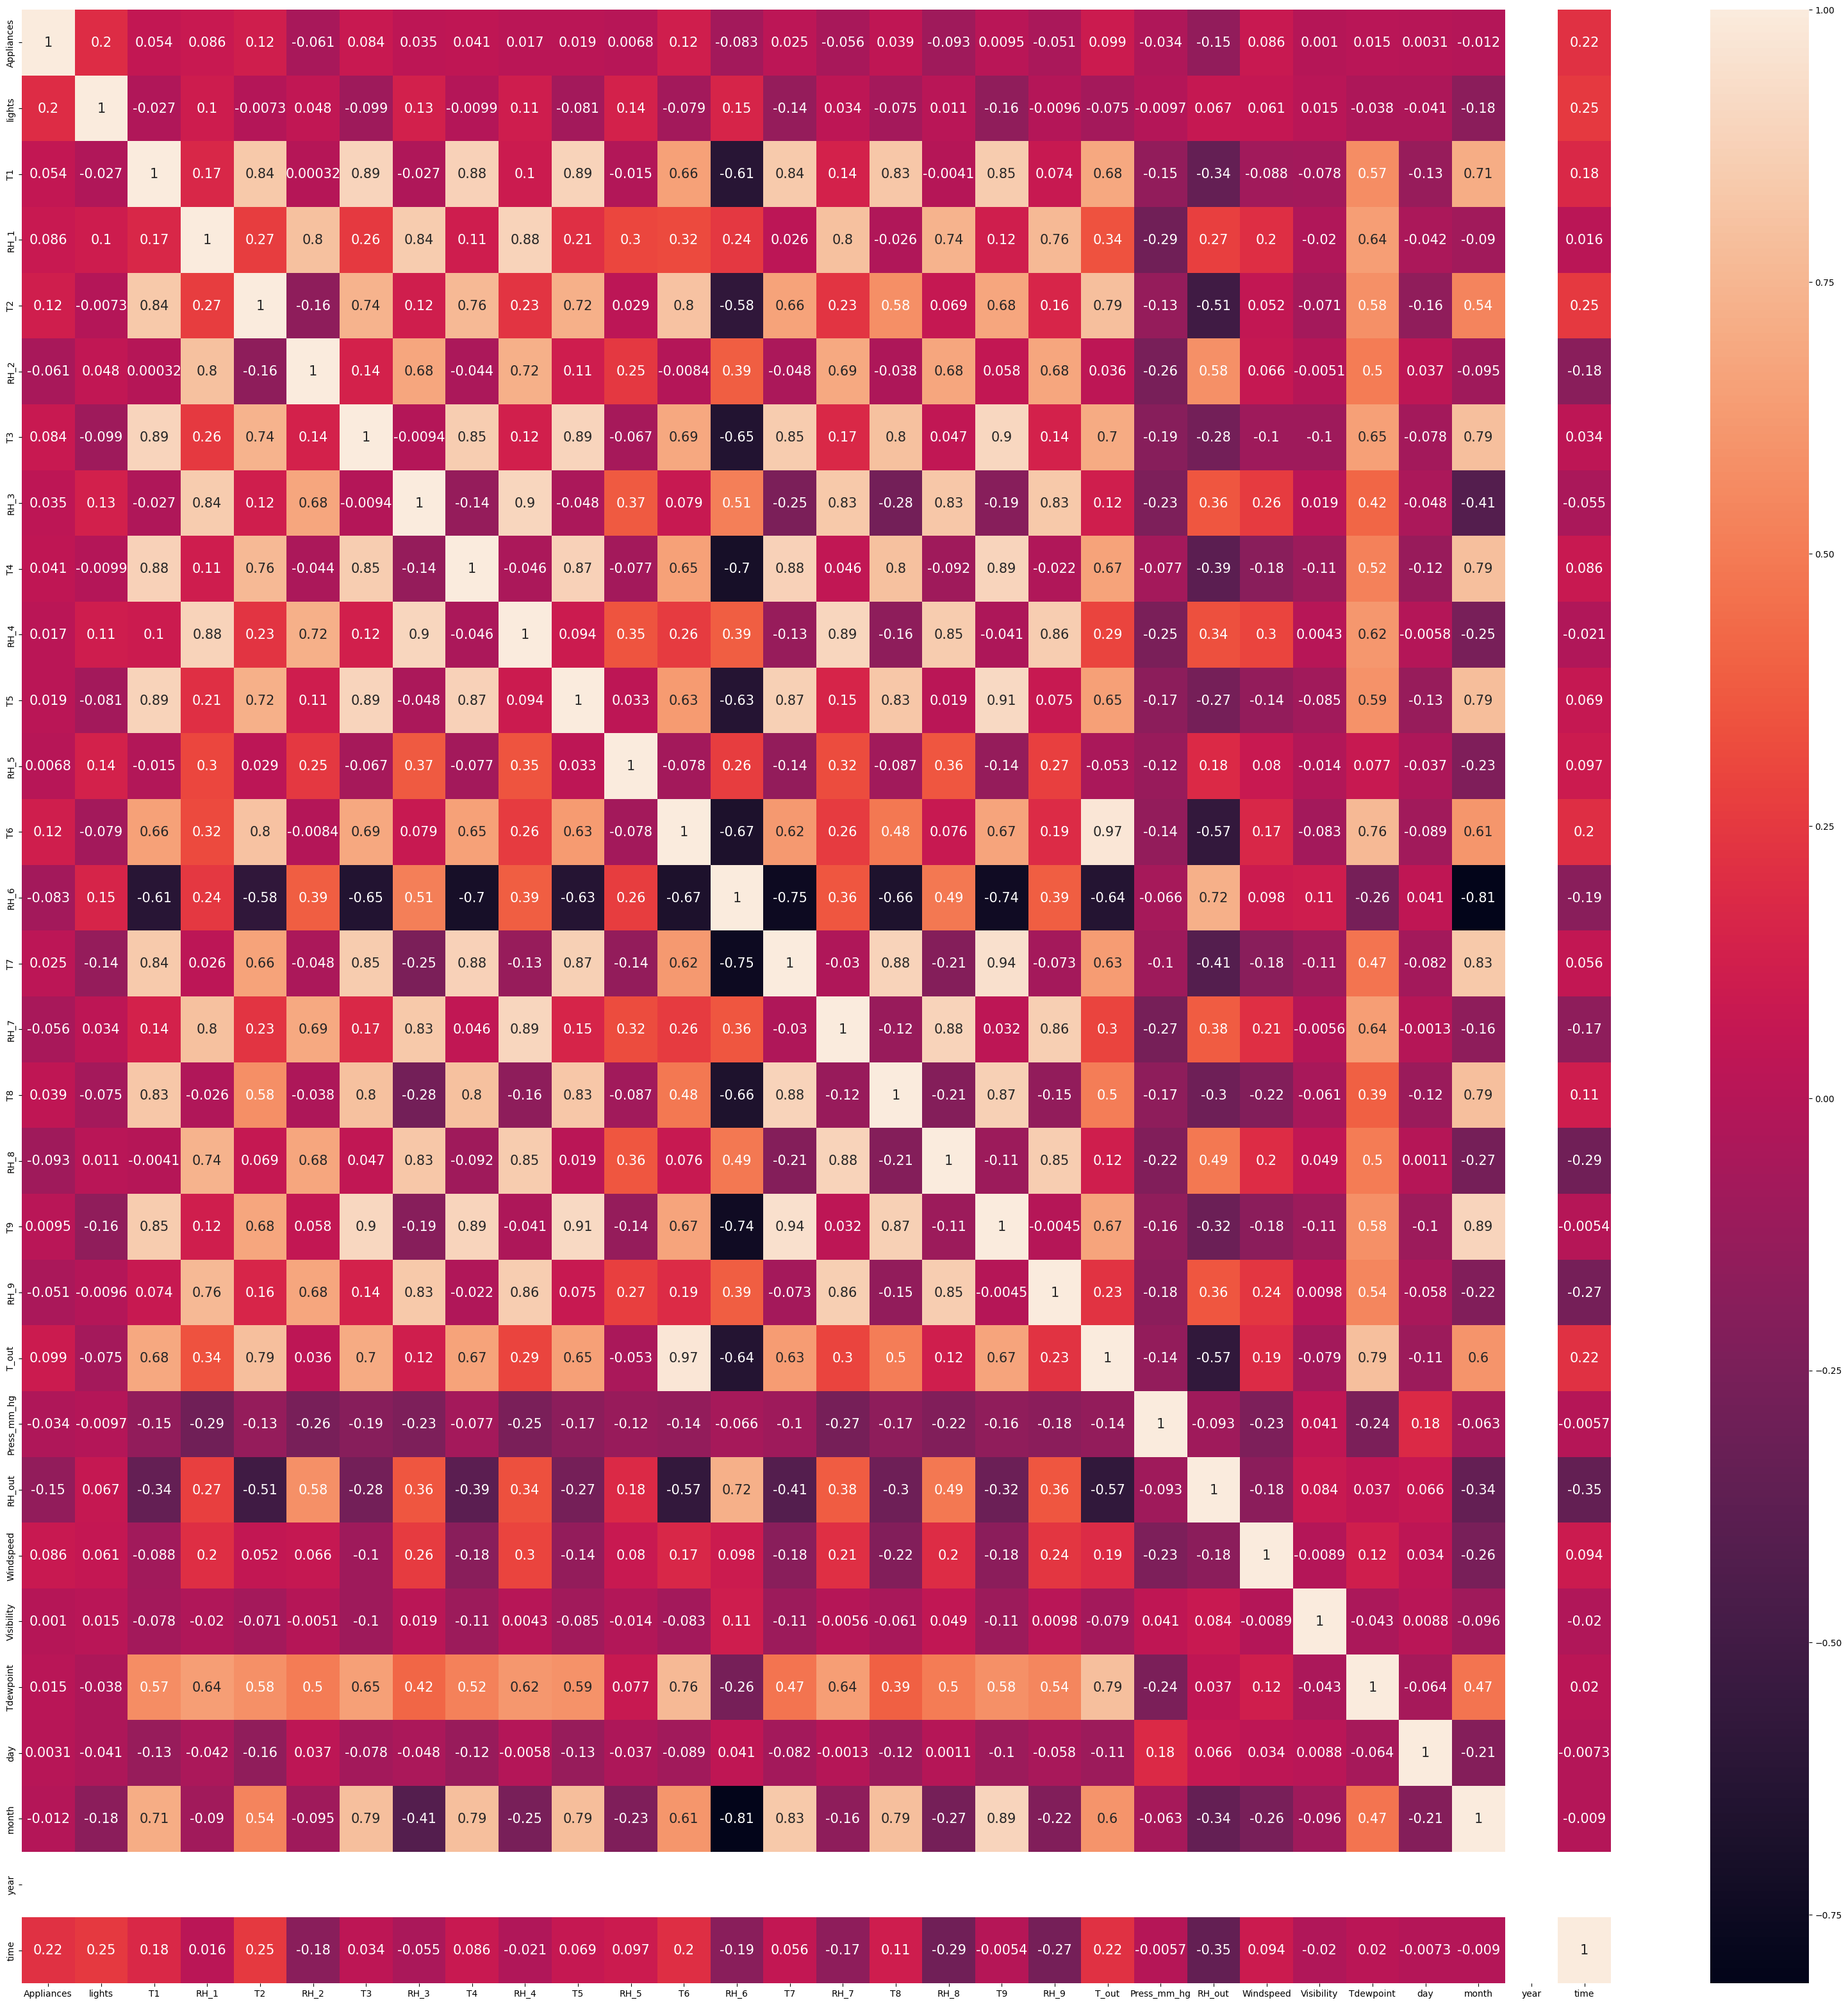

In [14]:
fig, ax = plt.subplots(figsize=(40,40))  
fig = sns.heatmap(models.corr(method='pearson'), annot=True, annot_kws={"fontsize":15}).get_figure()

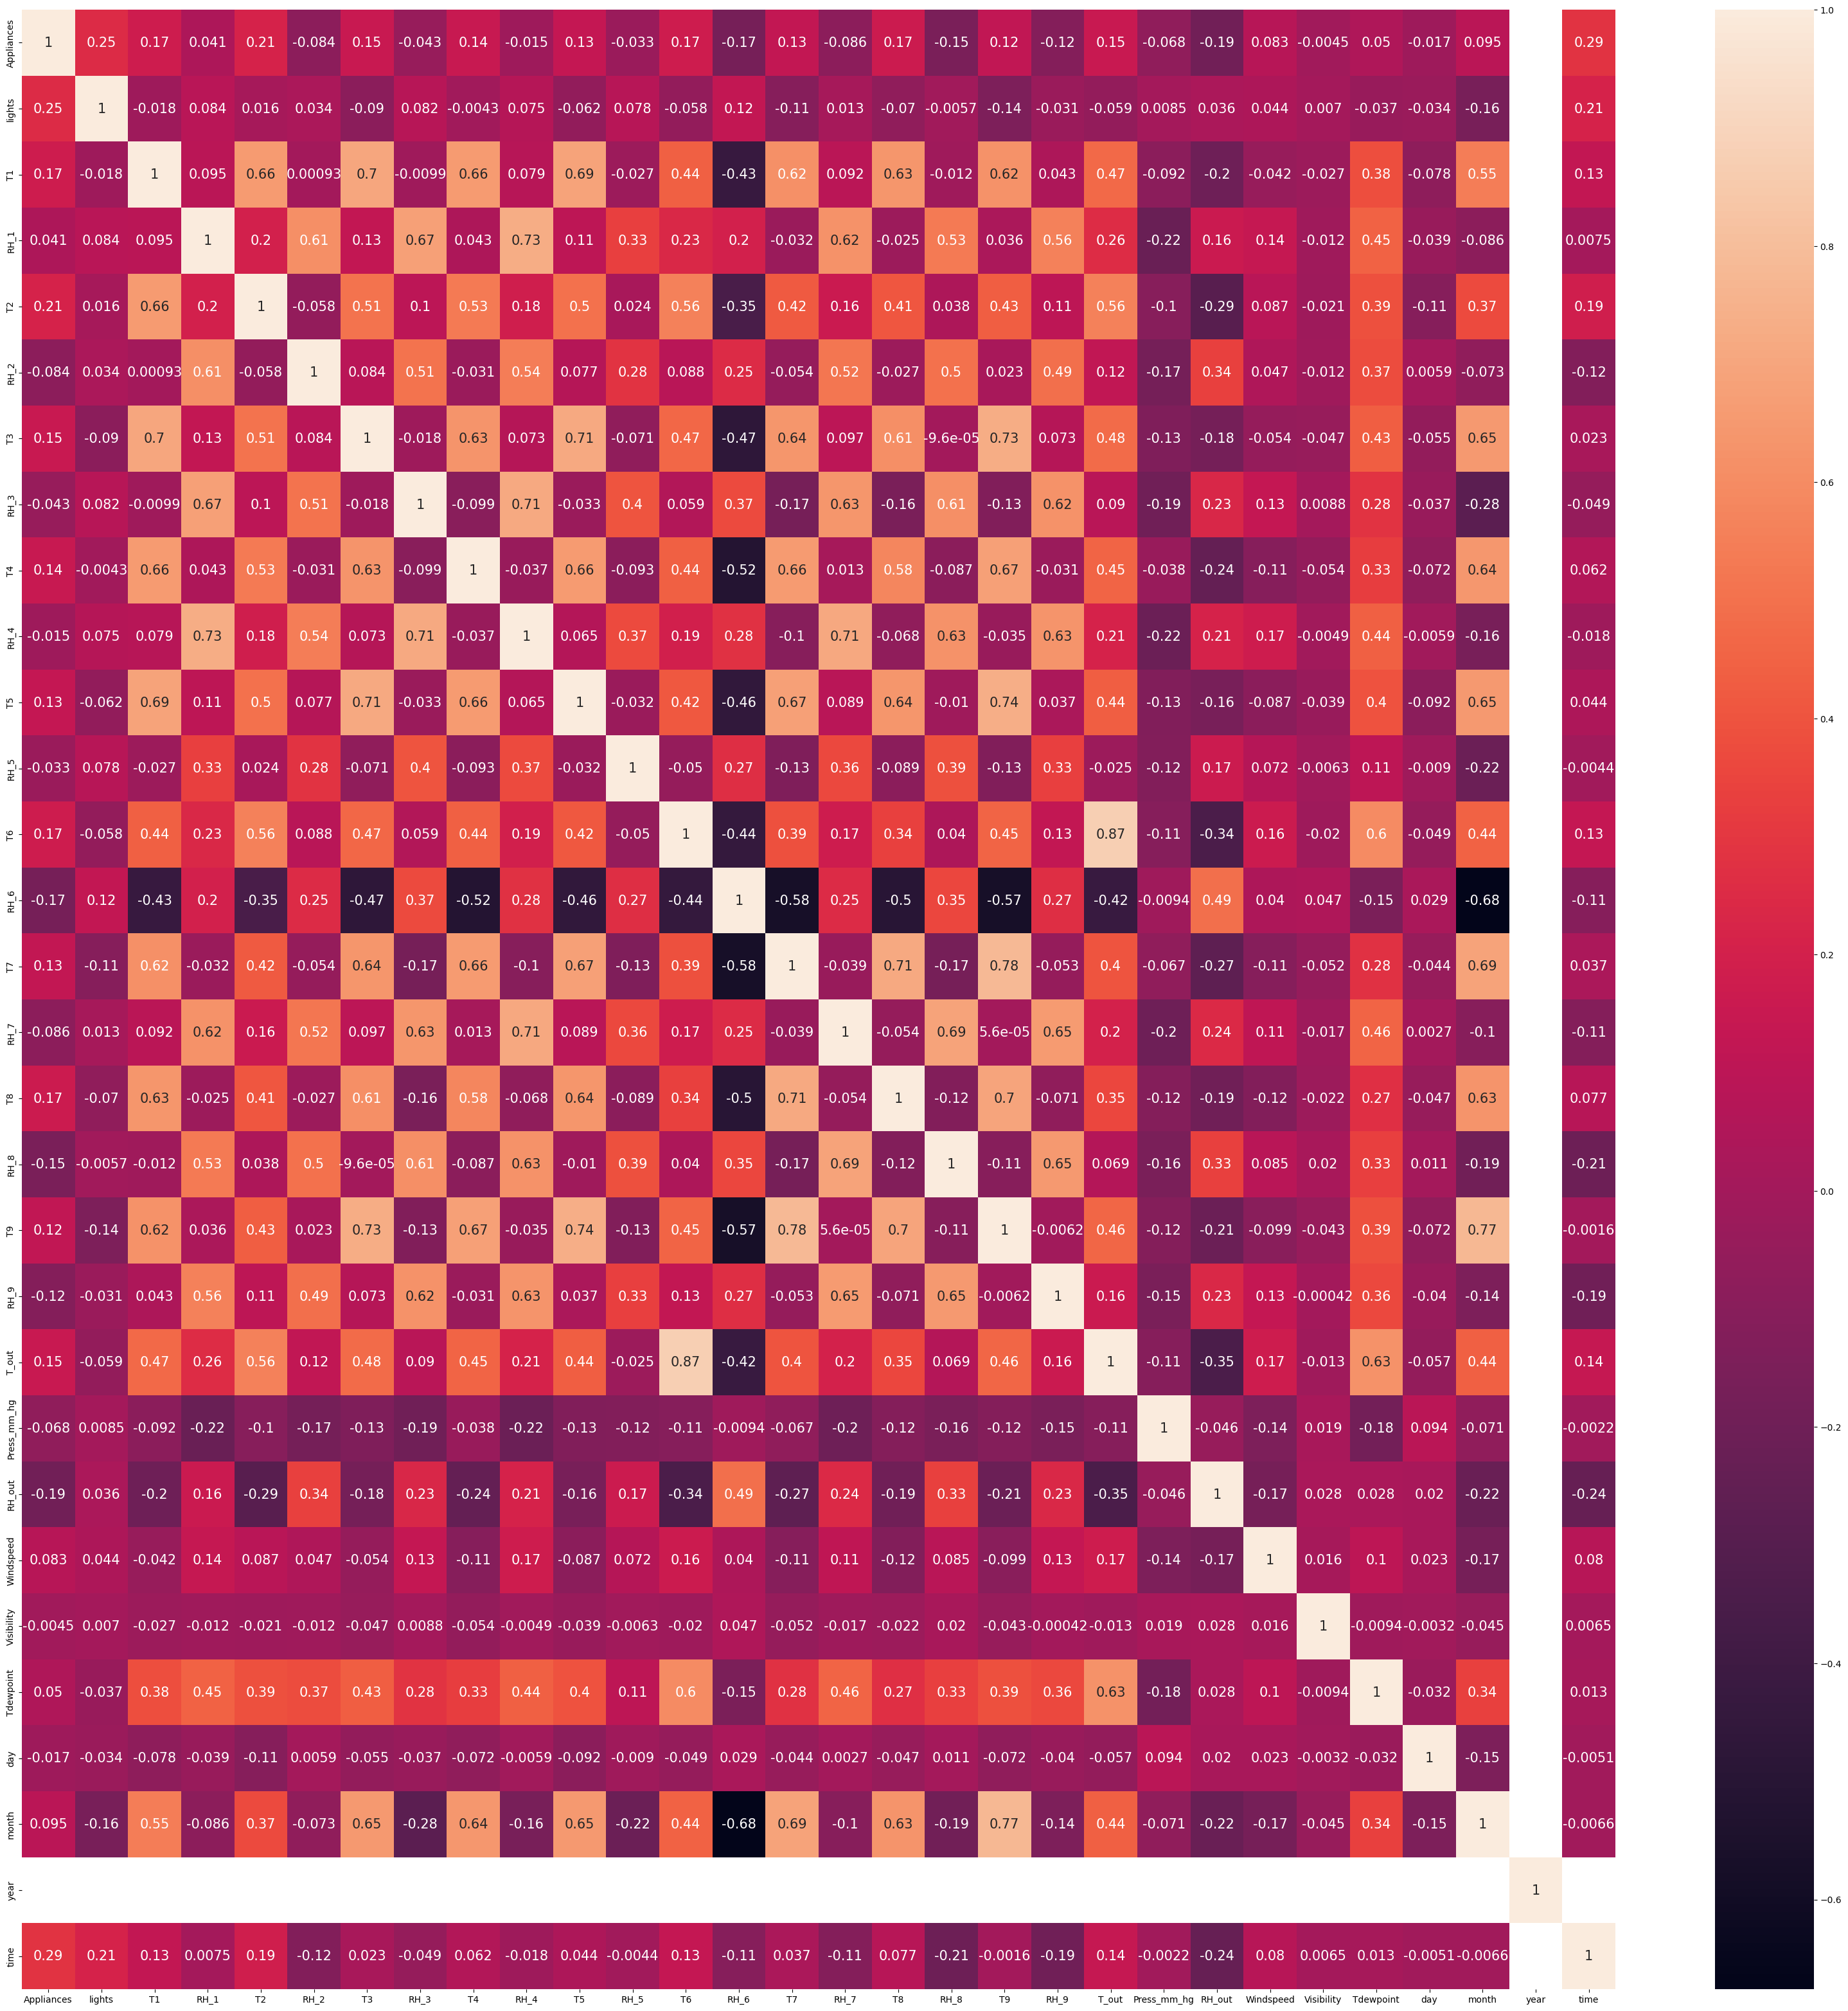

In [15]:
fig, ax = plt.subplots(figsize=(40,40))  
fig = sns.heatmap(models.corr(method='kendall'), annot=True, annot_kws={"fontsize":15}).get_figure()

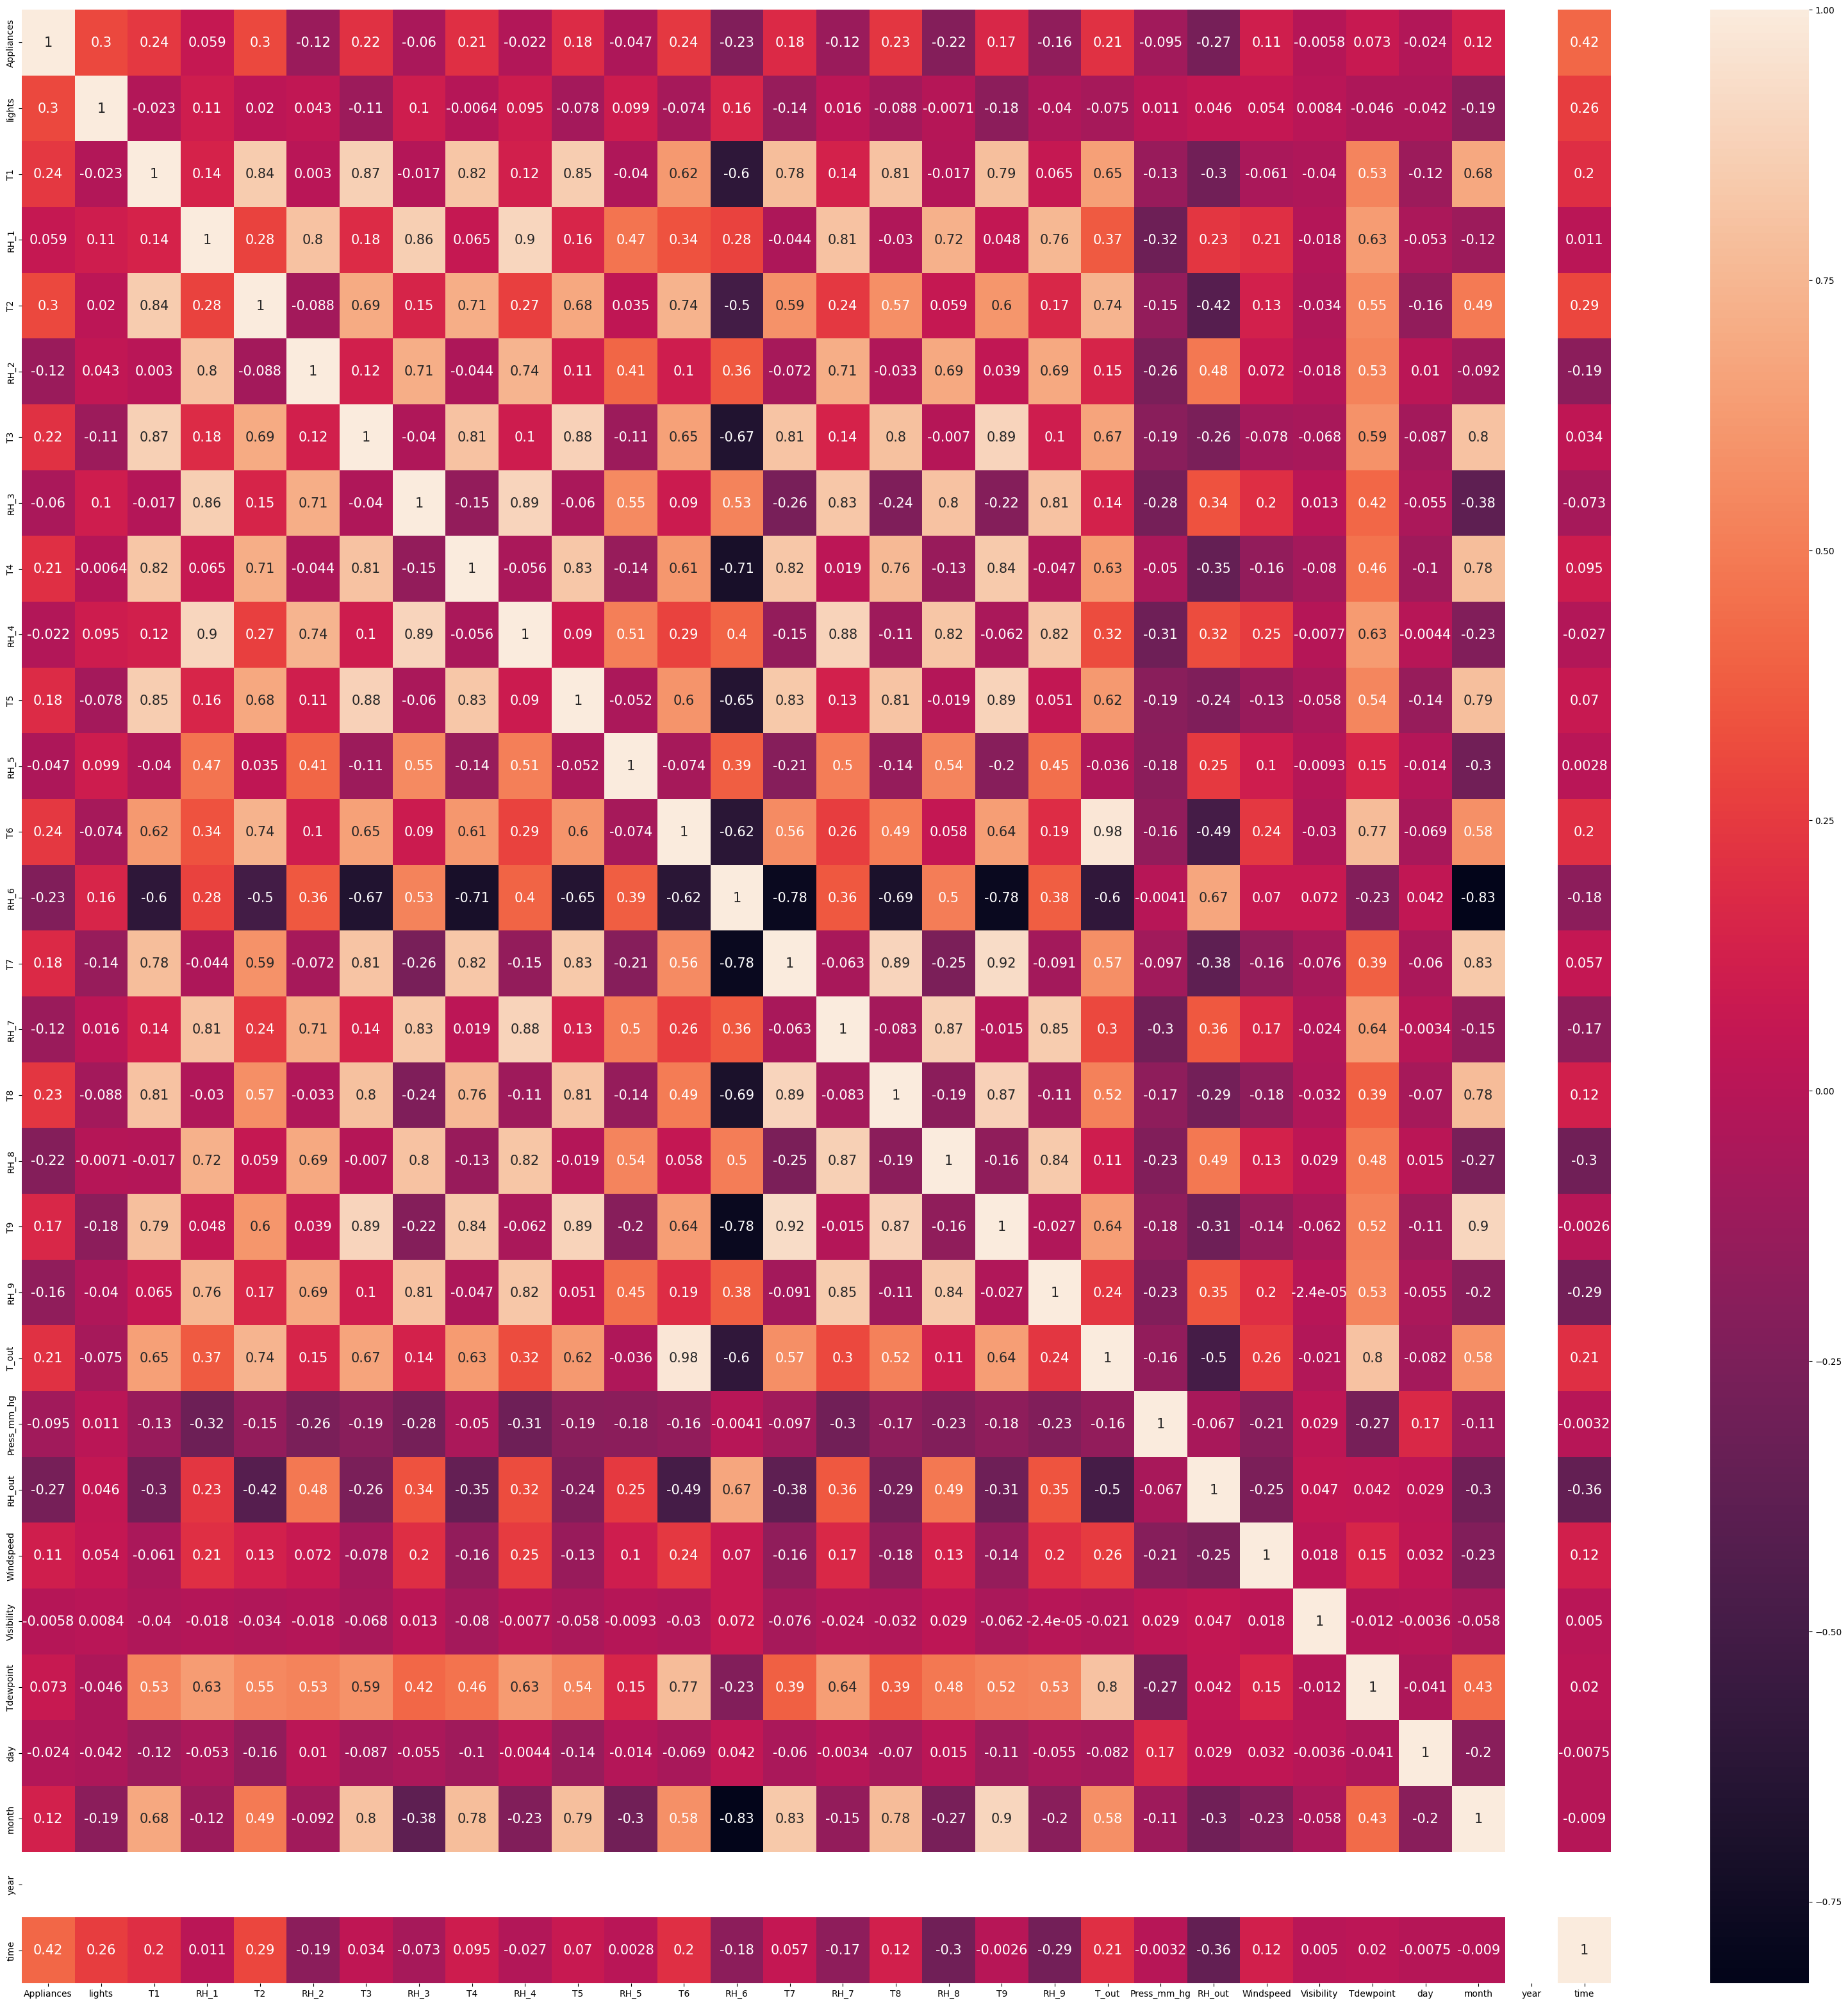

In [16]:
fig, ax = plt.subplots(figsize=(40,40))  
fig = sns.heatmap(models.corr(method='spearman'), annot=True, annot_kws={"fontsize":15}).get_figure()

# Рассмотрим признаки по отдельности, для Appliances.

In [17]:
possible_params = models.drop('Appliances', axis=1).columns
len(possible_params)

29

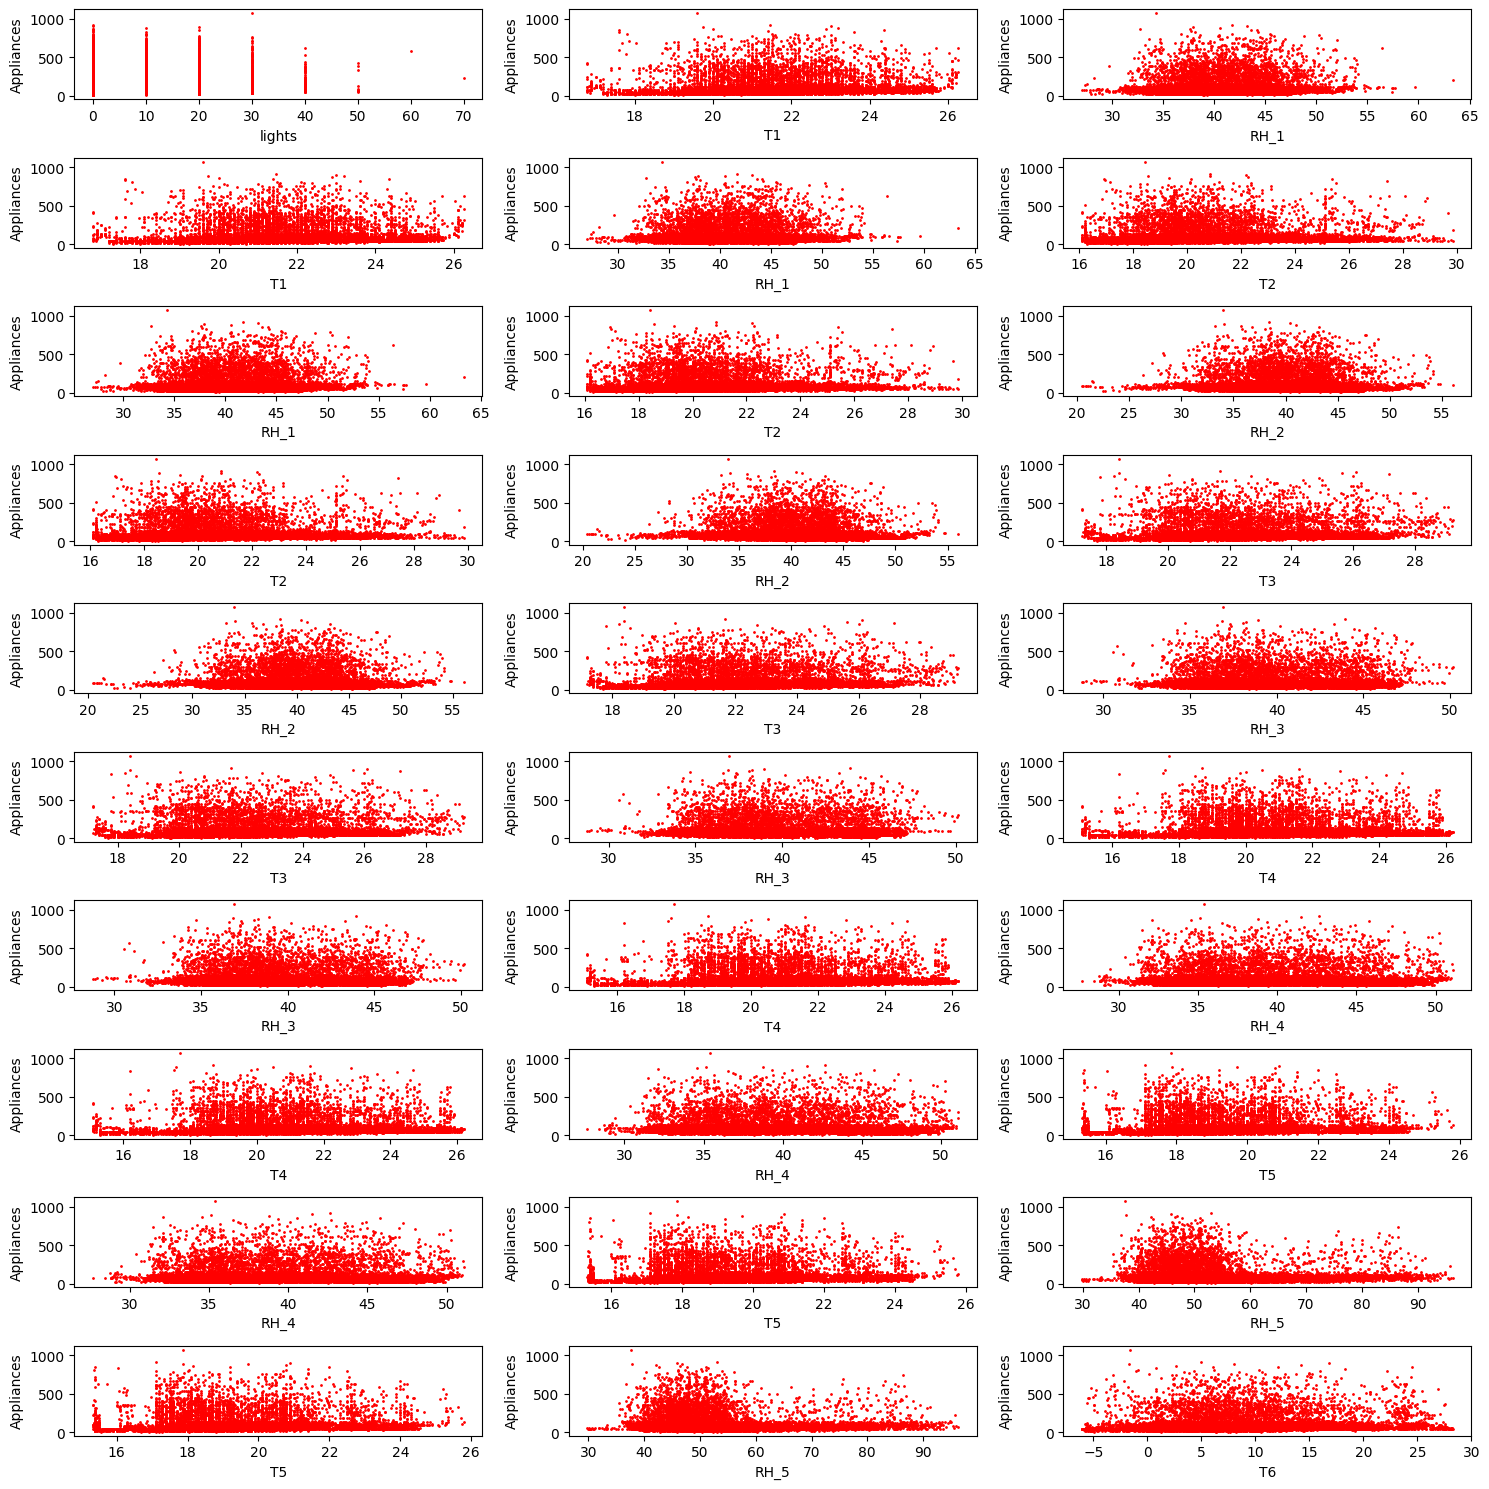

In [18]:
fig = plt.figure(tight_layout=True)
fig.set_figheight(15)
fig.set_figwidth(15)
gs = gridspec.GridSpec(10, 3)
for i in range(10):
    for j in range(3):
        ax = fig.add_subplot(gs[i, j])
        label = possible_params[i+j]
        ax.plot(models[label], models['Appliances'], 'ro', markersize=1)
        ax.set_ylabel('Appliances')
        ax.set_xlabel(label)